                                                The project aims to analyze movie trends 
                                                using TMDB Dataset with SQL and Python

Getting things done.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import mysql.connector

Getting our dataset from sql workbench.

In [2]:
connection  = mysql.connector.connect(host="localhost" , user = "root" , password = "legend@07" , database = "movie_analysis")

In [3]:
query  = "select * from all_movies"

In [4]:
df = pd.read_sql(query , connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_13536\162786456.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query , connection)


Successfully done.

In [5]:
df

id                         title  average_rating  total_votes  \
0        27205                     Inception           8.364        34495   
1       157336                  Interstellar           8.417        32571   
2          155               The Dark Knight           8.512        30619   
3        19995                        Avatar           7.573        29815   
4        24428                  The Avengers           7.710        29166   
...        ...                           ...             ...          ...   
865057  901037              Winter XXX Games           0.000            0   
865058  901038    A Estrela Oculta do Sertão           0.000            0   
865059  901041           Knife to a Gunfight           0.000            0   
865060  901042  Love Stories From Fukuoka 16           0.000            0   
865061  901073                 Taking Flight           0.000            0   

          status release_date  revenue_in_$  runtime_in_mins adult  \
0       Released   2010-07-15     825532764              148    No   
1       Released   2014-11-05     701729206              169    No   
2       Released   2008-07-16    1004558444              152    No   
3       Released   2009-12-15    2923706026              162    No   
4       Released   2012-04-25    1518815515              143    No   
...          ...          ...           ...              ...   ...   
865057  Released   2018-05-08             0                0   Yes   
865058  Released   2005-01-01             0                0    No   
865059  Released   2013-06-04             0               90    No   
865060  Released   2021-03-26             0               50    No   
865061  Released   2021-11-20             0                7    No   

        budget_in_$ original_language  popularity  \
0         160000000                en      83.952   
1         165000000                en     140.241   
2         185000000                en     130.643   
3         237000000                en      79.932   
4         220000000                en      98.082   
...             ...               ...         ...   
865057            0                en       0.600   
865058            0                pt       0.600   
865059            0                en       0.600   
865060            0                ja       0.600   
865061            0                en       0.600   

                                             genres  profit_in_$  year  
0                Action, Science Fiction, Adventure    665532764  2010  
1                 Adventure, Drama, Science Fiction    536729206  2014  
2                    Drama, Action, Crime, Thriller    819558444  2008  
3       Action, Adventure, Fantasy, Science Fiction   2686706026  2009  
4                Science Fiction, Action, Adventure   1298815515  2012  
...                                             ...          ...   ...  
865057                                         None            0  2018  
865058                                  Documentary            0  2005  
865059                                         None            0  2013  
865060                                         None            0  2021  
865061                                  Documentary            0  2021  

[865062 rows x 15 columns]

Seeing the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865062 entries, 0 to 865061
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 865062 non-null  int64  
 1   title              865062 non-null  object 
 2   average_rating     865062 non-null  float64
 3   total_votes        865062 non-null  int64  
 4   status             865062 non-null  object 
 5   release_date       865062 non-null  object 
 6   revenue_in_$       865062 non-null  int64  
 7   runtime_in_mins    865062 non-null  int64  
 8   adult              865062 non-null  object 
 9   budget_in_$        865062 non-null  int64  
 10  original_language  865062 non-null  object 
 11  popularity         865062 non-null  float64
 12  genres             594428 non-null  object 
 13  profit_in_$        865062 non-null  int64  
 14  year               865062 non-null  object 
dtypes: float64(2), int64(6), object(7)
memory usage: 99

In [7]:
df.sample(2)

id              title  average_rating  total_votes    status  \
33019   37998          Freeze Me           5.816           38  Released   
714737  81781  Silvesterchlausen           0.000            0  Released   

       release_date  revenue_in_$  runtime_in_mins adult  budget_in_$  \
33019    2000-05-27             0              101    No            0   
714737   2011-11-10             0                0    No            0   

       original_language  popularity                   genres  profit_in_$  \
33019                 ja       4.051  Drama, Horror, Thriller            0   
714737                de       0.600              Documentary            0   

        year  
33019   2000  
714737  2011

In [8]:
df.columns

Index(['id', 'title', 'average_rating', 'total_votes', 'status',
       'release_date', 'revenue_in_$', 'runtime_in_mins', 'adult',
       'budget_in_$', 'original_language', 'popularity', 'genres',
       'profit_in_$', 'year'],
      dtype='object')

In [9]:
df.describe()

id  average_rating    total_votes  revenue_in_$  \
count  8.650620e+05   865062.000000  865062.000000  8.650620e+05   
mean   6.768213e+05        2.404332      24.767661  8.672489e+05   
std    4.015985e+05        3.213645     364.898788  1.968635e+07   
min    2.000000e+00        0.000000       0.000000 -1.200000e+01   
25%    3.382132e+05        0.000000       0.000000  0.000000e+00   
50%    6.065885e+05        0.000000       0.000000  0.000000e+00   
75%    1.030875e+06        5.500000       2.000000  0.000000e+00   
max    1.409638e+06       10.000000   34495.000000  3.000000e+09   

       runtime_in_mins   budget_in_$     popularity   profit_in_$  
count    865062.000000  8.650620e+05  865062.000000  8.650620e+05  
mean         54.208970  3.332677e+05       1.467257  5.339812e+05  
std          61.490841  5.410945e+06       8.672116  1.630685e+07  
min           0.000000  0.000000e+00       0.000000 -8.880000e+08  
25%           3.000000  0.000000e+00       0.600000  0.000000e+00  
50%          48.000000  0.000000e+00       0.600000  0.000000e+00  
75%          91.000000  0.000000e+00       1.111000  0.000000e+00  
max       14400.000000  8.880000e+08    2994.360000  2.750000e+09

It simply doesnt make any sense to check the mean or median for profit in a movie.

Checking missing values.

In [10]:
df.isna().sum()/len(df)*100

id                    0.000000
title                 0.000000
average_rating        0.000000
total_votes           0.000000
status                0.000000
release_date          0.000000
revenue_in_$          0.000000
runtime_in_mins       0.000000
adult                 0.000000
budget_in_$           0.000000
original_language     0.000000
popularity            0.000000
genres               31.284925
profit_in_$           0.000000
year                  0.000000
dtype: float64

We have some missing values. As I cannot simply create any genres for the movies, I will drop these values.

In [11]:
df.dropna(inplace = True)

In [12]:
df

id                                              title  \
0        27205                                          Inception   
1       157336                                       Interstellar   
2          155                                    The Dark Knight   
3        19995                                             Avatar   
4        24428                                       The Avengers   
...        ...                                                ...   
865054  901034  Battle Diary: A Day In The Life of Charlie Martin   
865055  901035                              Rat and the Beanstalk   
865056  901036                                   Dangerous Waters   
865058  901038                         A Estrela Oculta do Sertão   
865061  901073                                      Taking Flight   

        average_rating  total_votes    status release_date  revenue_in_$  \
0                8.364        34495  Released   2010-07-15     825532764   
1                8.417        32571  Released   2014-11-05     701729206   
2                8.512        30619  Released   2008-07-16    1004558444   
3                7.573        29815  Released   2009-12-15    2923706026   
4                7.710        29166  Released   2012-04-25    1518815515   
...                ...          ...       ...          ...           ...   
865054           0.000            0  Released   1994-11-11             0   
865055           0.000            0  Released   1971-01-01             0   
865056           0.000            0  Released   1994-10-18             0   
865058           0.000            0  Released   2005-01-01             0   
865061           0.000            0  Released   2021-11-20             0   

        runtime_in_mins adult  budget_in_$ original_language  popularity  \
0                   148    No    160000000                en      83.952   
1                   169    No    165000000                en     140.241   
2                   152    No    185000000                en     130.643   
3                   162    No    237000000                en      79.932   
4                   143    No    220000000                en      98.082   
...                 ...   ...          ...               ...         ...   
865054               45    No            0                en       0.600   
865055                2    No            0                en       0.600   
865056               91    No            0                en       0.600   
865058                0    No            0                pt       0.600   
865061                7    No            0                en       0.600   

                                             genres  profit_in_$  year  
0                Action, Science Fiction, Adventure    665532764  2010  
1                 Adventure, Drama, Science Fiction    536729206  2014  
2                    Drama, Action, Crime, Thriller    819558444  2008  
3       Action, Adventure, Fantasy, Science Fiction   2686706026  2009  
4                Science Fiction, Action, Adventure   1298815515  2012  
...                                             ...          ...   ...  
865054                                  Documentary            0  1994  
865055                                    Animation            0  1971  
865056                   Action, Adventure, Romance            0  1994  
865058                                  Documentary            0  2005  
865061                                  Documentary            0  2021  

[594428 rows x 15 columns]

In [13]:
df.isna().sum()/len(df)*100

id                   0.0
title                0.0
average_rating       0.0
total_votes          0.0
status               0.0
release_date         0.0
revenue_in_$         0.0
runtime_in_mins      0.0
adult                0.0
budget_in_$          0.0
original_language    0.0
popularity           0.0
genres               0.0
profit_in_$          0.0
year                 0.0
dtype: float64

Checking outliers.

With outlier, which are simply extreme values that are in our data and create inconsistencies they may not create an inconsistency here. 
As, we know that profits of some movies might be very high than others. Similary it also goes the same to budget, revenue etc.

<Axes: ylabel='profit_in_$'>

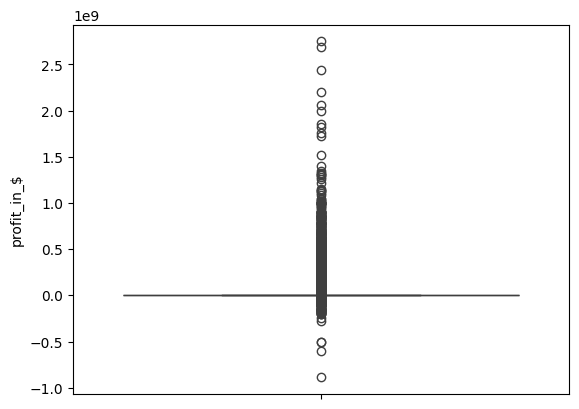

In [14]:
sns.boxplot(df["profit_in_$"])

There are some data points that are below the 0.0 . This might suggest that some movies may have made loss in thier profits.

As i made the profit column in the sql where I used profit = revenue - budget. What if the revenue is 0 and budget is >0? This way the
profit might have an entry of -ve.

Lets check our revenue column.

In [15]:
df[df["revenue_in_$"]==0]

id                                              title  \
325     405774                                           Bird Box   
328     791373                       Zack Snyder's Justice League   
395     466282                  To All the Boys I've Loved Before   
509     454983                                  The Kissing Booth   
670     766507                                               Prey   
...        ...                                                ...   
865054  901034  Battle Diary: A Day In The Life of Charlie Martin   
865055  901035                              Rat and the Beanstalk   
865056  901036                                   Dangerous Waters   
865058  901038                         A Estrela Oculta do Sertão   
865061  901073                                      Taking Flight   

        average_rating  total_votes    status release_date  revenue_in_$  \
325              6.854         9227  Released   2018-12-13             0   
328              8.190         9202  Released   2021-03-18             0   
395              7.642         8045  Released   2018-08-16             0   
509              7.229         6926  Released   2018-05-11             0   
670              7.762         5821  Released   2022-08-02             0   
...                ...          ...       ...          ...           ...   
865054           0.000            0  Released   1994-11-11             0   
865055           0.000            0  Released   1971-01-01             0   
865056           0.000            0  Released   1994-10-18             0   
865058           0.000            0  Released   2005-01-01             0   
865061           0.000            0  Released   2021-11-20             0   

        runtime_in_mins adult  budget_in_$ original_language  popularity  \
325                 124    No     19800000                en      27.913   
328                 242    No     70000000                en     130.690   
395                 100    No            0                en      38.926   
509                 105    No            0                en      36.649   
670                 100    No     65000000                en     154.579   
...                 ...   ...          ...               ...         ...   
865054               45    No            0                en       0.600   
865055                2    No            0                en       0.600   
865056               91    No            0                en       0.600   
865058                0    No            0                pt       0.600   
865061                7    No            0                en       0.600   

                                   genres  profit_in_$  year  
325               Horror, Thriller, Drama    -19800000  2018  
328            Action, Adventure, Fantasy    -70000000  2021  
395                       Comedy, Romance            0  2018  
509                       Romance, Comedy            0  2018  
670     Thriller, Action, Science Fiction    -65000000  2022  
...                                   ...          ...   ...  
865054                        Documentary            0  1994  
865055                          Animation            0  1971  
865056         Action, Adventure, Romance            0  1994  
865058                        Documentary            0  2005  
865061                        Documentary            0  2021  

[576186 rows x 15 columns]

As expected there are so many entries of movies where revenue= 0.

In [16]:
df[df["budget_in_$"]==0]

id                                              title  \
258     372058                                         Your Name.   
375     664413                                           365 Days   
395     466282                  To All the Boys I've Loved Before   
509     454983                                  The Kissing Booth   
652     200727                                        Love, Rosie   
...        ...                                                ...   
865054  901034  Battle Diary: A Day In The Life of Charlie Martin   
865055  901035                              Rat and the Beanstalk   
865056  901036                                   Dangerous Waters   
865058  901038                         A Estrela Oculta do Sertão   
865061  901073                                      Taking Flight   

        average_rating  total_votes    status release_date  revenue_in_$  \
258              8.514        10303  Released   2016-08-26     357986087   
375              7.063         8429  Released   2020-02-07       9458590   
395              7.642         8045  Released   2018-08-16             0   
509              7.229         6926  Released   2018-05-11             0   
652              7.837         5918  Released   2014-10-16       4439431   
...                ...          ...       ...          ...           ...   
865054           0.000            0  Released   1994-11-11             0   
865055           0.000            0  Released   1971-01-01             0   
865056           0.000            0  Released   1994-10-18             0   
865058           0.000            0  Released   2005-01-01             0   
865061           0.000            0  Released   2021-11-20             0   

        runtime_in_mins adult  budget_in_$ original_language  popularity  \
258                 106    No            0                ja      68.999   
375                 116    No            0                pl      32.781   
395                 100    No            0                en      38.926   
509                 105    No            0                en      36.649   
652                 102    No            0                en      29.428   
...                 ...   ...          ...               ...         ...   
865054               45    No            0                en       0.600   
865055                2    No            0                en       0.600   
865056               91    No            0                en       0.600   
865058                0    No            0                pt       0.600   
865061                7    No            0                en       0.600   

                            genres  profit_in_$  year  
258      Romance, Animation, Drama    357986087  2016  
375                 Romance, Drama      9458590  2020  
395                Comedy, Romance            0  2018  
509                Romance, Comedy            0  2018  
652         Romance, Drama, Comedy      4439431  2014  
...                            ...          ...   ...  
865054                 Documentary            0  1994  
865055                   Animation            0  1971  
865056  Action, Adventure, Romance            0  1994  
865058                 Documentary            0  2005  
865061                 Documentary            0  2021  

[552918 rows x 15 columns]

The same also goes for the budget.

In [17]:
df[(df["budget_in_$"]==0) & (df["revenue_in_$"]==0)]

id                                              title  \
395     466282                  To All the Boys I've Loved Before   
509     454983                                  The Kissing Booth   
872     583083                                The Kissing Booth 2   
944     559969                    El Camino: A Breaking Bad Movie   
975     376570                                               Hush   
...        ...                                                ...   
865054  901034  Battle Diary: A Day In The Life of Charlie Martin   
865055  901035                              Rat and the Beanstalk   
865056  901036                                   Dangerous Waters   
865058  901038                         A Estrela Oculta do Sertão   
865061  901073                                      Taking Flight   

        average_rating  total_votes    status release_date  revenue_in_$  \
395              7.642         8045  Released   2018-08-16             0   
509              7.229         6926  Released   2018-05-11             0   
872              7.703         4796  Released   2020-07-24             0   
944              6.948         4454  Released   2019-10-11             0   
975              6.739         4313  Released   2016-03-12             0   
...                ...          ...       ...          ...           ...   
865054           0.000            0  Released   1994-11-11             0   
865055           0.000            0  Released   1971-01-01             0   
865056           0.000            0  Released   1994-10-18             0   
865058           0.000            0  Released   2005-01-01             0   
865061           0.000            0  Released   2021-11-20             0   

        runtime_in_mins adult  budget_in_$ original_language  popularity  \
395                 100    No            0                en      38.926   
509                 105    No            0                en      36.649   
872                 132    No            0                en      25.333   
944                 123    No            0                en      23.311   
975                  82    No            0                en      12.858   
...                 ...   ...          ...               ...         ...   
865054               45    No            0                en       0.600   
865055                2    No            0                en       0.600   
865056               91    No            0                en       0.600   
865058                0    No            0                pt       0.600   
865061                7    No            0                en       0.600   

                                genres  profit_in_$  year  
395                    Comedy, Romance            0  2018  
509                    Romance, Comedy            0  2018  
872                    Comedy, Romance            0  2020  
944     Crime, Drama, Thriller, Action            0  2019  
975                   Horror, Thriller            0  2016  
...                                ...          ...   ...  
865054                     Documentary            0  1994  
865055                       Animation            0  1971  
865056      Action, Adventure, Romance            0  1994  
865058                     Documentary            0  2005  
865061                     Documentary            0  2021  

[546742 rows x 15 columns]

We have so many data which are having 0 values lets first replace them with Nan values. 

In [18]:
df["revenue_in_$"].replace(0 , np.nan , inplace = True)

In [19]:
df["budget_in_$"].replace(0 , np.nan , inplace = True)

In [20]:
df["profit_in_$"].replace(0 , np.nan , inplace = True)

In [21]:
df.isnull().sum()/len(df)*100

id                    0.000000
title                 0.000000
average_rating        0.000000
total_votes           0.000000
status                0.000000
release_date          0.000000
revenue_in_$         96.931167
runtime_in_mins       0.000000
adult                 0.000000
budget_in_$          93.016816
original_language     0.000000
popularity            0.000000
genres                0.000000
profit_in_$          92.114436
year                  0.000000
dtype: float64

This is not good. We have more than 90% of our data missing.

Now, we have to fix and know to solve or approach this issue.

In [22]:
df.sample(3)

id                    title  average_rating  total_votes  \
8415      27040  Meshes of the Afternoon           7.679          332   
247402  1031229   Clips Explosion Vol 16          10.000            1   
270884   630767               Road Marks           9.000            1   

          status release_date  revenue_in_$  runtime_in_mins adult  \
8415    Released   1943-01-01           NaN               14    No   
247402  Released   2008-01-01           NaN                0    No   
270884  Released   2006-01-01           NaN               21    No   

        budget_in_$ original_language  popularity  genres  profit_in_$  year  
8415          275.0                en       8.552  Horror       -275.0  1943  
247402          NaN                en       0.600   Music          NaN  2008  
270884          NaN                he       0.872   Drama          NaN  2006

Now, what if i group up every movie by genre and fill it usng its median?
This may not be the best, as we can also use regression to predict the missing values using the other available features.
But for now, lets fill the missing columns with the help of using group by and median. 

In [23]:
df['budget_in_$'] = df.groupby('genres')['budget_in_$'].transform(lambda x: x.fillna(x.median()))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.n

In [24]:
df.sample(3)

id                                           title  \
839327   940941                          The Wooing of Winifred   
377283  1148261   Sin Dios – ...Más De Diez Años de Autogestión   
206462   151890  Glennis Grace - Live in de Heineken Music Hall   

        average_rating  total_votes    status release_date  revenue_in_$  \
839327             0.0            0  Released   1911-04-11           NaN   
377283             0.0            0  Released   2000-01-01           NaN   
206462             5.0            2  Released   2012-11-01           NaN   

        runtime_in_mins adult  budget_in_$ original_language  popularity  \
839327                0    No      20000.0                en         0.6   
377283                0    No      12800.0                es         0.6   
206462                0    No       3250.0                en         0.6   

             genres  profit_in_$  year  
839327       Comedy          NaN  1911  
377283  Documentary          NaN  2000  
206462        Music          NaN  2012

In [25]:
df['revenue_in_$'] = df.groupby('genres')['revenue_in_$'].transform(lambda x: x.fillna(x.median()))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.n

In [26]:
df.isna().sum()/len(df)*100

id                    0.000000
title                 0.000000
average_rating        0.000000
total_votes           0.000000
status                0.000000
release_date          0.000000
revenue_in_$          5.162442
runtime_in_mins       0.000000
adult                 0.000000
budget_in_$           3.129059
original_language     0.000000
popularity            0.000000
genres                0.000000
profit_in_$          92.114436
year                  0.000000
dtype: float64

Lets also fix the profit column.

In [27]:
df["profit_in_$"] = df["revenue_in_$"] - df["budget_in_$"]

In [28]:
df.isna().sum()/len(df)*100

id                   0.000000
title                0.000000
average_rating       0.000000
total_votes          0.000000
status               0.000000
release_date         0.000000
revenue_in_$         5.162442
runtime_in_mins      0.000000
adult                0.000000
budget_in_$          3.129059
original_language    0.000000
popularity           0.000000
genres               0.000000
profit_in_$          5.473161
year                 0.000000
dtype: float64

Drop all the remaining missing values.

In [29]:
df.dropna(inplace = True)

In [30]:
df.isna().sum()/len(df)*100

id                   0.0
title                0.0
average_rating       0.0
total_votes          0.0
status               0.0
release_date         0.0
revenue_in_$         0.0
runtime_in_mins      0.0
adult                0.0
budget_in_$          0.0
original_language    0.0
popularity           0.0
genres               0.0
profit_in_$          0.0
year                 0.0
dtype: float64

In [31]:
df.sample(3)

id                title  average_rating  total_votes    status  \
14282    426375            Malicious           5.711          147  Released   
25309     28564  Manhattan Melodrama           6.966           58  Released   
470570  1036334  Super Senior Heroes           0.000            0  Released   

       release_date  revenue_in_$  runtime_in_mins adult  budget_in_$  \
14282    2018-06-23     1131001.0               90    No    3500000.0   
25309    1934-05-04     2380000.0               93    No    1000000.0   
470570   2022-10-16     9938268.0              140    No    4000000.0   

       original_language  popularity                   genres  profit_in_$  \
14282                 en       8.670         Thriller, Horror   -2368999.0   
25309                 en       5.425    Crime, Drama, Romance    1380000.0   
470570                ta       1.068  Comedy, Fantasy, Family    5938268.0   

        year  
14282   2018  
25309   1934  
470570  2022

What i have done is grouping up the similar movies then calculating the median and filling the missing values.

We could have also used the regression also.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561894 entries, 0 to 865061
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 561894 non-null  int64  
 1   title              561894 non-null  object 
 2   average_rating     561894 non-null  float64
 3   total_votes        561894 non-null  int64  
 4   status             561894 non-null  object 
 5   release_date       561894 non-null  object 
 6   revenue_in_$       561894 non-null  float64
 7   runtime_in_mins    561894 non-null  int64  
 8   adult              561894 non-null  object 
 9   budget_in_$        561894 non-null  float64
 10  original_language  561894 non-null  object 
 11  popularity         561894 non-null  float64
 12  genres             561894 non-null  object 
 13  profit_in_$        561894 non-null  float64
 14  year               561894 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 68.6+ M

In [33]:
df["release_date"] = pd.to_datetime(df["release_date"])

In [34]:
df["year"] = df["release_date"].dt.year

In [35]:
filtered_df = df[(df["year"]<2031) & (df["year"]>1899)]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561894 entries, 0 to 865061
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 561894 non-null  int64         
 1   title              561894 non-null  object        
 2   average_rating     561894 non-null  float64       
 3   total_votes        561894 non-null  int64         
 4   status             561894 non-null  object        
 5   release_date       561894 non-null  datetime64[ns]
 6   revenue_in_$       561894 non-null  float64       
 7   runtime_in_mins    561894 non-null  int64         
 8   adult              561894 non-null  object        
 9   budget_in_$        561894 non-null  float64       
 10  original_language  561894 non-null  object        
 11  popularity         561894 non-null  float64       
 12  genres             561894 non-null  object        
 13  profit_in_$        561894 non-null  float64      

In [37]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561886 entries, 0 to 865061
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 561886 non-null  int64         
 1   title              561886 non-null  object        
 2   average_rating     561886 non-null  float64       
 3   total_votes        561886 non-null  int64         
 4   status             561886 non-null  object        
 5   release_date       561886 non-null  datetime64[ns]
 6   revenue_in_$       561886 non-null  float64       
 7   runtime_in_mins    561886 non-null  int64         
 8   adult              561886 non-null  object        
 9   budget_in_$        561886 non-null  float64       
 10  original_language  561886 non-null  object        
 11  popularity         561886 non-null  float64       
 12  genres             561886 non-null  object        
 13  profit_in_$        561886 non-null  float64      

In [38]:
filtered_df.sample(3)

id                     title  average_rating  total_votes  \
500396  1243919                    Danger             0.0            0   
470414  1036090         L’école est finie             0.0            0   
844131   944274  Las amantes del narco II             0.0            0   

          status release_date  revenue_in_$  runtime_in_mins adult  \
500396  Released   2018-09-04       40976.0                9    No   
470414  Released   2022-10-06       40976.0                0    No   
844131  Released   2018-01-01      492438.5               95    No   

        budget_in_$ original_language  popularity       genres  profit_in_$  \
500396       3000.0                en       0.000  Documentary      37976.0   
470414      12800.0                fr       0.600  Documentary      28176.0   
844131      10000.0                es       0.832        Drama     482438.5   

        year  
500396  2018  
470414  2022  
844131  2018

Our missing values have also been taken into consideration and is completed.

Lets start our analysis.

                                                        Movie Trends

1- Number of movies released each year.

In [39]:
count_by_year = filtered_df[(filtered_df["year"] < 2025) & (filtered_df["year"] > 1999)].groupby("year").size()


C:\Users\HP\AppData\Local\Temp\ipykernel_13536\1979443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count_by_year , palette="viridis" )


<Axes: xlabel='Year', ylabel='Number of Movies'>

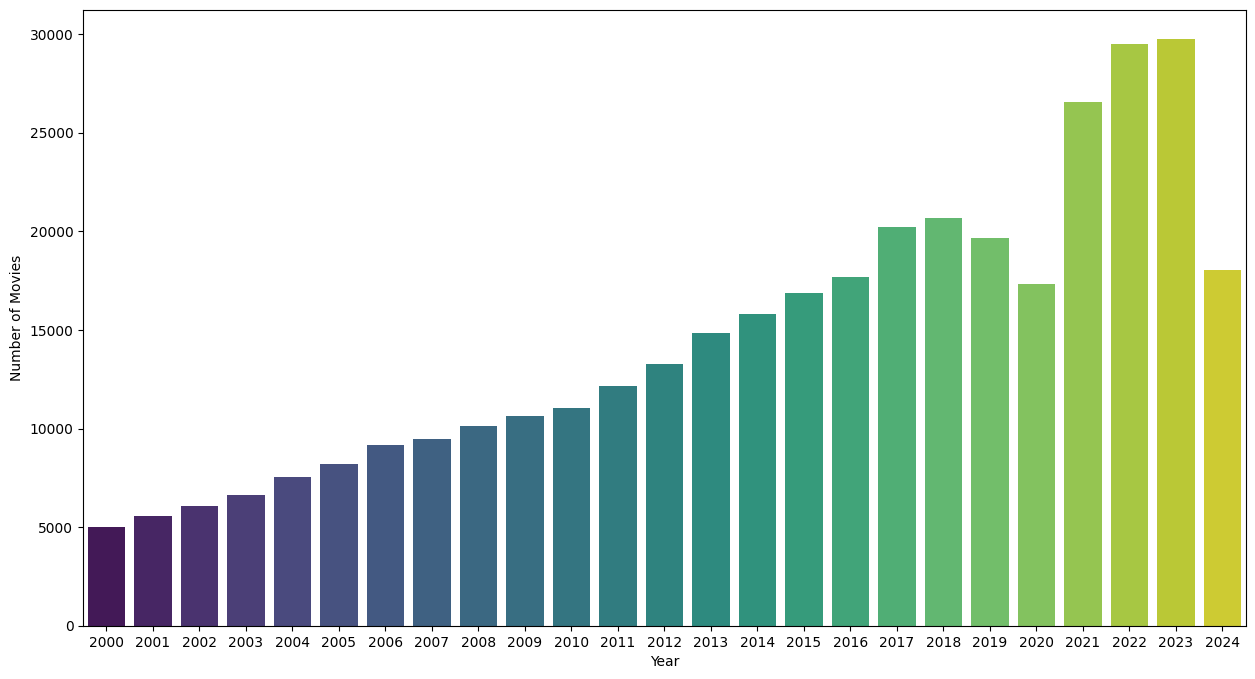

In [40]:
plt.figure(figsize = (15,8))
plt.xlabel("Year")
plt.ylabel("Number of Movies")
sns.barplot(data = count_by_year , palette="viridis" ) 

For the year, 2021, 2022, 2023 the number of movies released were much higher than other years.

2- Average runtime over the years.

In [41]:
filtered_df.sample(3)

id                                          title  \
268158  1173493  Le Retour : Enquête sur Seïf al-Islam Kadhafi   
568688  1338682                                 Me and My Girl   
384775  1379645                             Unheard of Stories   

        average_rating  total_votes    status release_date  revenue_in_$  \
268158            10.0            1  Released   2023-09-19       40976.0   
568688             0.0            0  Released   1995-08-11      313582.0   
384775             0.0            0  Released   2012-06-15     1015759.5   

        runtime_in_mins adult  budget_in_$ original_language  popularity  \
268158                0    No      12800.0                fr        1.87   
568688              166    No       3250.0                ja        0.00   
384775                0    No       2000.0                zh        0.60   

                genres  profit_in_$  year  
268158     Documentary      28176.0  2023  
568688           Music     310332.0  1995  
384775  Horror, Comedy    1013759.5  2012

In [42]:
filtered_df["runtime_in_mins"]

0         148
1         169
2         152
3         162
4         143
         ... 
865054     45
865055      2
865056     91
865058      0
865061      7
Name: runtime_in_mins, Length: 561886, dtype: int64

In [43]:
average_runtime = filtered_df.groupby("year")["runtime_in_mins"].mean()

In [44]:
average_runtime

year
1900     1.475936
1901     3.111111
1902     2.230088
1903     2.541935
1904     4.328358
          ...    
2026    19.541667
2027    32.437500
2028    98.600000
2029    40.000000
2030     0.000000
Name: runtime_in_mins, Length: 131, dtype: float64

<Axes: xlabel='Year', ylabel='Avergae Runtime in Minutes'>

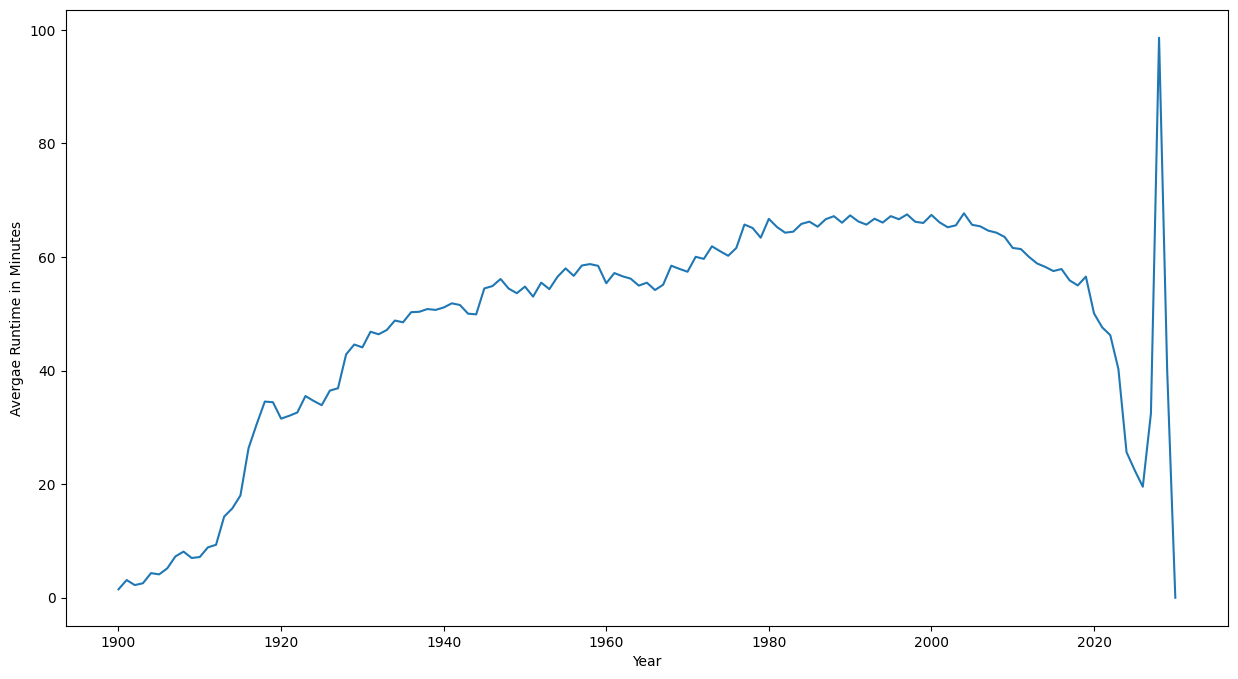

In [45]:
plt.figure(figsize = (15,8))
plt.xlabel("Year")
plt.ylabel("Avergae Runtime in Minutes")
sns.lineplot(data = average_runtime)

With this line plot we can see the runtime of movies over the years. The runtime has increased significantly from the 1900s.

                                                Budget, Revenue and Profit Analysis

3- Top 5 most profitable movies.

In [46]:
filtered_df["profit_in_$"]

0         6.655328e+08
1         5.367292e+08
2         8.195584e+08
3         2.686706e+09
4         1.298816e+09
              ...     
865054    2.817600e+04
865055    3.301500e+04
865056    2.836000e+06
865058    2.817600e+04
865061    2.817600e+04
Name: profit_in_$, Length: 561886, dtype: float64

In [47]:
profitable_movies = filtered_df[["title" ,"profit_in_$"]].sort_values(by= "profit_in_$" ,ascending = False).head(5)

<Axes: xlabel='Movie Title', ylabel='Profit in $'>

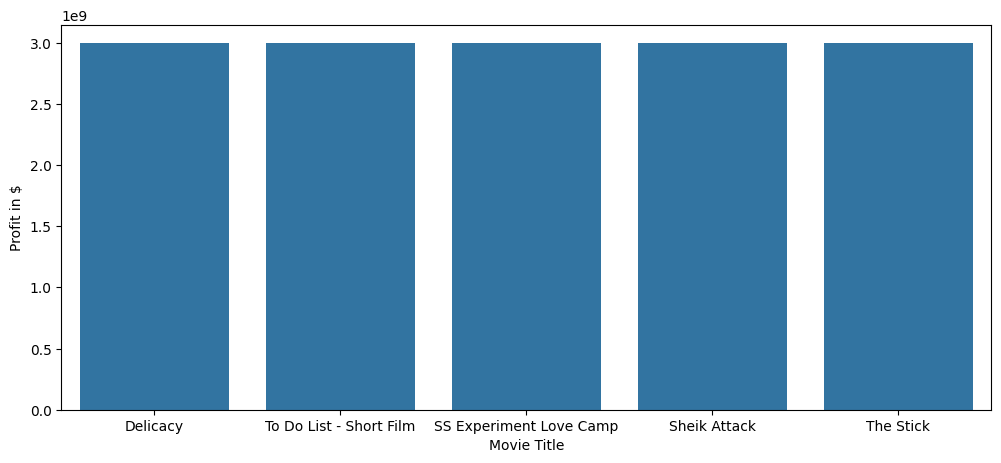

In [48]:
plt.figure(figsize = (12,5))
plt.xlabel("Movie Title")
plt.ylabel("Profit in $")
sns.barplot(data = profitable_movies , x = "title" , y = "profit_in_$")

The profit column might not give excellent insights as the revenue and budget column was mostly filled with Nan values.
After replacing them with median of the grouped data we created the profit.

4- Profit over the years.

In [49]:
profit_over_years = filtered_df.groupby("year")["profit_in_$"].sum()

In [50]:
profit_over_years

year
1900    346183434.0
1901    366292040.5
1902    170862992.5
1903    390222580.0
1904    269775190.0
           ...     
2026    753062792.0
2027    176308825.5
2028    -17523126.5
2029     19746901.5
2030     15141969.5
Name: profit_in_$, Length: 131, dtype: float64

<Axes: xlabel='Year', ylabel='Total Profit in $'>

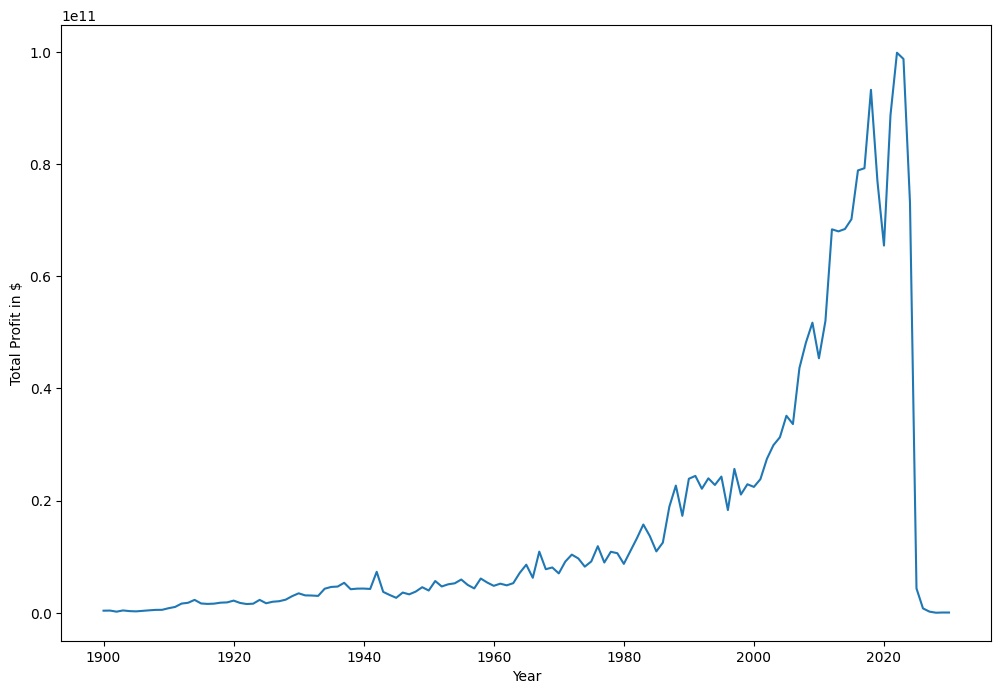

In [51]:
plt.figure(figsize = (12,8))
plt.xlabel("Year")
plt.ylabel("Total Profit in $")
sns.lineplot(data = profit_over_years)

5- Relationship b/w budget, revenue and profit.

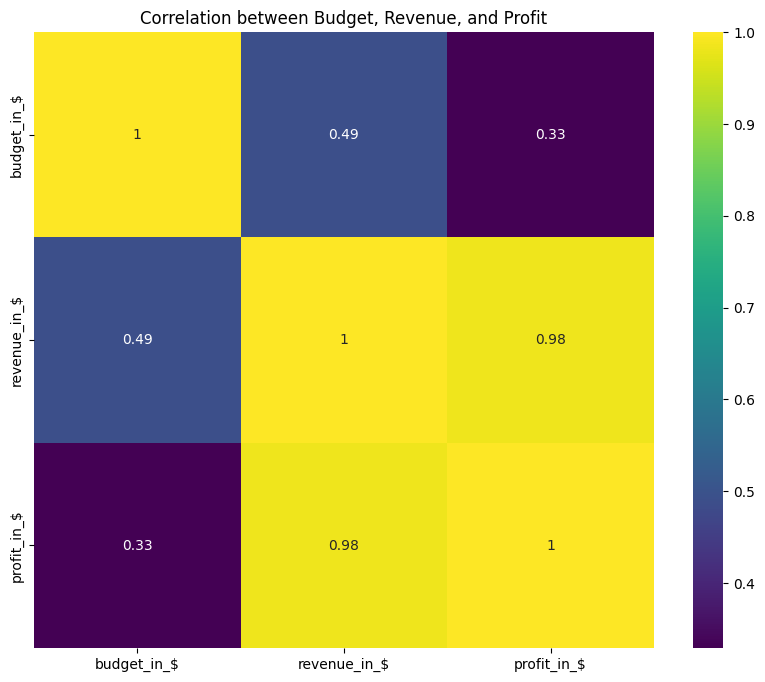

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_df[['budget_in_$', 'revenue_in_$', 'profit_in_$']].corr(), annot=True, cmap='viridis')
plt.title('Correlation between Budget, Revenue, and Profit')
plt.show()

We can totally see that the revenue and profit are very highly correlated. It means that as revenue increases, profit tends to increase as well, and vice versa

                                                        Genres and their impact

6- Which genres generate the highest average profit?

In [53]:
group_genres= filtered_df.groupby("genres")["profit_in_$"].mean().sort_values(ascending = False).head(5)

In [54]:
group_genres

genres
Horror, War                                     2.954667e+09
Family, Fantasy, Romance                        1.106116e+09
Animation, Horror                               9.999920e+08
Adventure, Action, Comedy, Fantasy              9.668391e+08
Action, Animation, Comedy, Family, Adventure    9.515526e+08
Name: profit_in_$, dtype: float64

<Axes: ylabel='profit_in_$'>

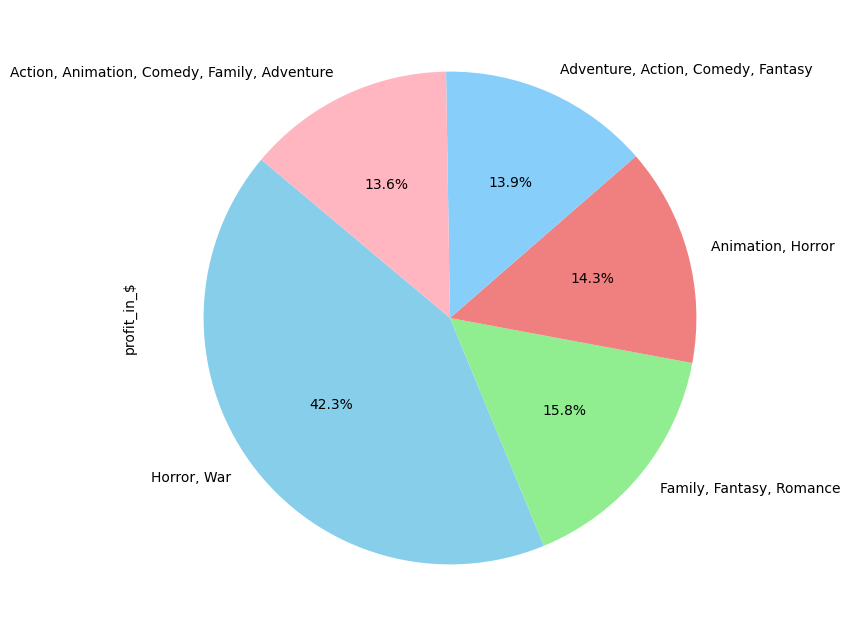

In [55]:
plt.figure(figsize=(10, 8))
group_genres.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'], figsize=(10, 8))

Out of all the top 5 average genres profit, the horror and war genres comes on top.

7- How does genre diversity correlate with popularity?

In [56]:
generes_popularity = filtered_df.groupby("genres")["popularity"].mean().sort_values(ascending = False).head(5)

In [57]:
generes_popularity

genres
Action, Mystery, Thriller, Crime                      1547.2200
Animation, Comedy, Family, Fantasy, Romance           1008.9400
Action, Crime, Science Fiction, Drama                  320.9665
Animation, Family, Comedy, Action, Science Fiction     257.3550
Animation, Family, Adventure, Fantasy, Comedy          236.9335
Name: popularity, dtype: float64

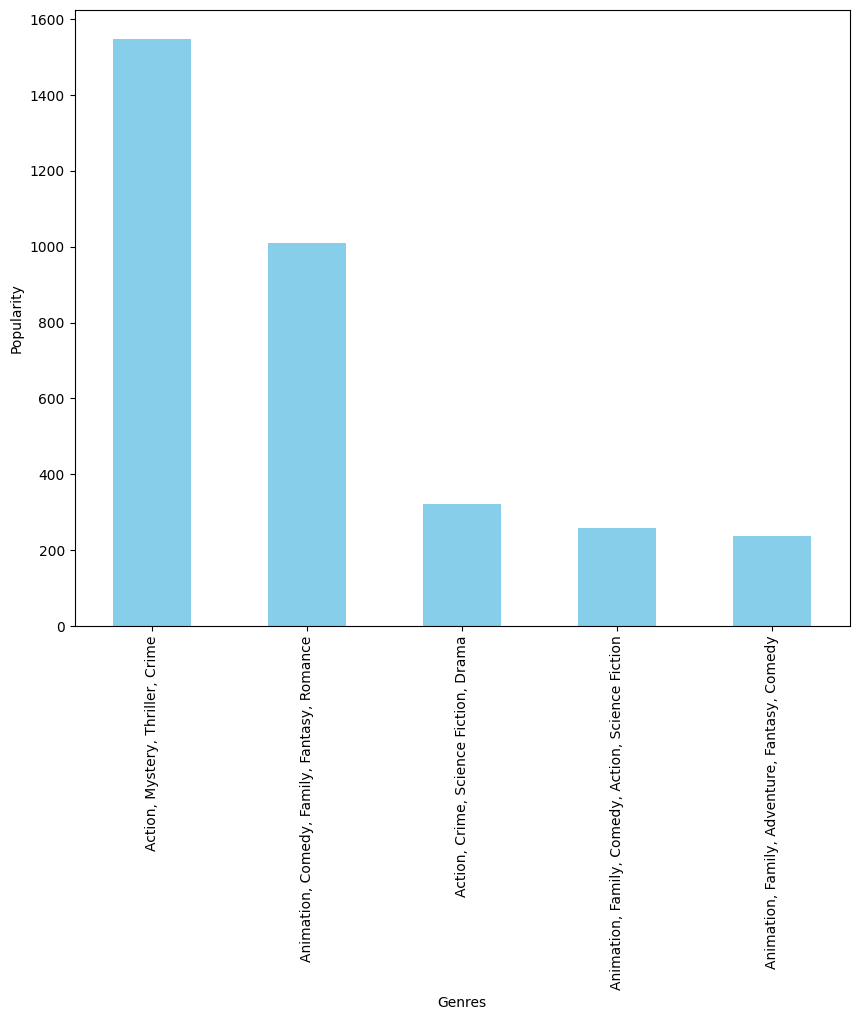

In [58]:
plt.figure(figsize=(10, 8))
generes_popularity.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.show()

The one common thing we can find is that action is highly popular among the people. 

                                                    Audience Preferences and Ratings

8- Correlation b/w the ratings, votes and popularity. 

Text(0.5, 1.0, 'Correlation between Ratings, Votes, and Popularity')

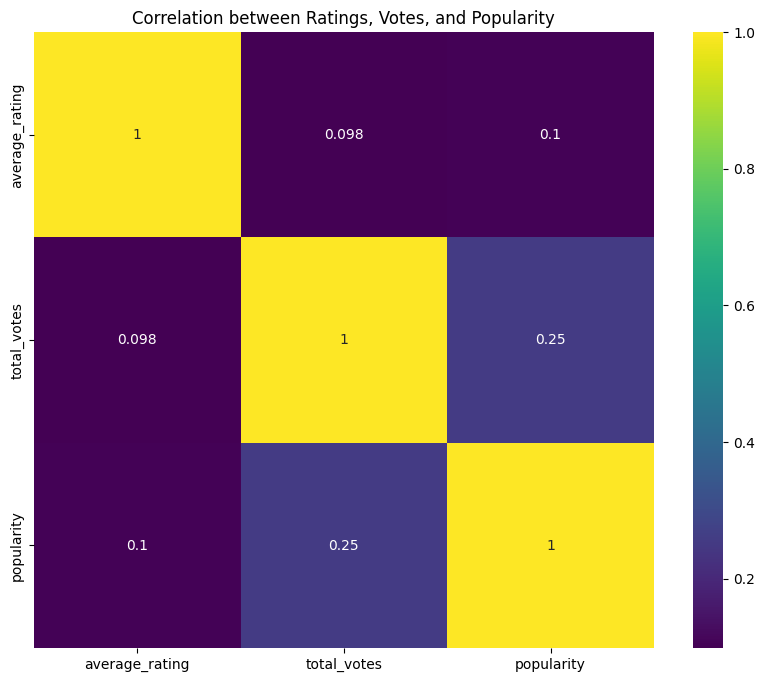

In [73]:
ratings_votes = filtered_df[["average_rating" , "total_votes" , "popularity"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_votes, annot=True, cmap='viridis')
plt.title('Correlation between Ratings, Votes, and Popularity')

If the votes of the movies are high then rating itself is higher and vice versa.

                                                            Conclusion

Number of Movies Released Each Year
A steady increase in movie releases was observed from the 1980s to the mid-2010s, with a decline afterward.

Average Runtime Over the Years
Movie runtimes remained relatively stable, averaging between 90 and 120 minutes, with minor fluctuations over decades.

Profit Trends Over the Years
Profits showed a consistent rise, peaking in certain years due to the success of major film franchises and innovative storytelling.

Relationship Between Profit, Revenue, and Budget
A positive correlation exists between profit and revenue, but profit optimization depends on balancing production costs and market reach.
Also a postive correlation exists between revenue and budget.

Genres Generating the Highest Profit
Action, Adventure, Fantasy and Horror genres consistently led in profitability, driven by broad audience appeal and franchise success.

Genres Correlated with Popularity
Popularity was highest for Action, Animation and Romance reflecting audience preferences for entertainment and humor.

Correlation Between Rating, Votes, and Popularity
Ratings and total votes showed strong correlations with popularity, emphasizing the role of audience feedback in driving interest.

                                                            Future Scope

Predictive Modeling: Implement machine learning models to predict movie profitability based on budget, genre, and cast.

Genre Performance Analysis: Incorporate additional metadata like director reputation and production studio influence.

Streaming vs. Theatrical Releases: Analyze the impact of streaming services on movie profitability trends.